#### **Welcome to Assignment 2**
This assignment consists of three parts. Part-1 is based on the content you learned in Week-3 of course and Part-2 is based on the content you learned in Week-4 of the course. Part-3 is **un-graded** and mainly designed to help you flex the Deep Learning muscles grown in Part-2. 

Unlike the first two parts, you'll have to implement everything from scratch in Part-3. If you find answers to questions in Part-3, feel free to head out to the forums and discuss them with your classmates!

#### **Instructions**
1. Use Python 3.x to run this notebook
2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'.
you should not change anything else in the code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.
3. Read documentation of each function carefully.
4. All the Best!

# Part-1

In [1]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
#  uncomment this line if you're running this notebook on your local PC

In [2]:
# DO NOT CHANGE THIS CODE
np.random.seed(10)

### Question 1 : Line detection from a given image.


Find the starting and ending point co-ordinates of detected lines of a given image (line.png) using hough transform.

Following criterion need to be satisfied to qualify as a line:

(a) Minimum line length = 60;
(b) Maximum allowed gap between line segments = 250;
(c) Accumulator threshold parameter = 15  (only those lines are returned that get enough votes);
(d) Distance resolution of the accumulator in pixels = 1;
(e) Angle resolution of the accumulator in radians = pi/180



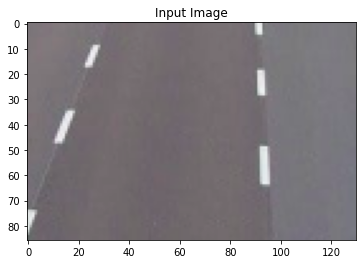

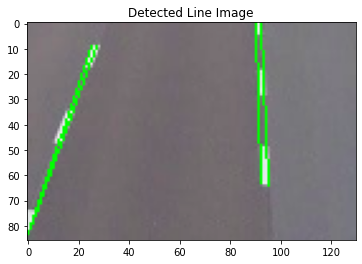

The lines detected are: 
[[[ 0 83 25  9]]

 [[92  0 95 64]]

 [[ 1 81 27  9]]

 [[90  0 92 63]]]


In [3]:
#Read image 
img = cv2.imread('line.png', cv2.IMREAD_COLOR)

# Visualize the input image
plt.imshow(img)
plt.title('Input Image')
plt.show()

#### YOUR CODE STARTS HERE #####
#convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#### YOUR CODE ENDS HERE #####

#Find the edges in the image using canny detector

edges = cv2.Canny(gray, 50, 200)

#### YOUR CODE STARTS HERE #####
lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength = 60, maxLineGap = 250)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), ( 0,255, 0), 1)
#### YOUR CODE ENDS HERE #####
plt.imshow(img)
plt.title('Detected Line Image')
plt.show()
print("The lines detected are: ")
print(lines)

##Question 2: Point matching using RANSAC

Given two sets of points related by affine transformation(with an outlier rate), use the RANSAC method to estimate the Affine transformation parameters between them and the number of inliers(Matching points).

What is the estimated number of inliers for an outlier rate of 0.9?


In [4]:
import numpy as np
np.random.seed(0)


# Affine Transformation
# |x'|  = |a, b| * |x|  +  |tx|
# |y'|    |c, d|   |y|     |ty|
# points_t =    A   * points_s  + t

# -------------------------------------------------------------

class Transform():

    def create_case(self, out_rate):
        ''' CREATE_CASE

            Method to generate a test case for affine transformation

            Input arguments:
            - out_rate : the percentage of outliers in test case

            Outputs:
            - points_s : Source points that will be transformed
            - points_t : warped points
            - A, t : parameters of affine transformation, A is a 2x2
            matrix, t is a 2x1 vector, both of them are created randomly

        '''


        # Generate an affine transformation
        # A is a 2x2 matrix, with values in range -2 to 2
        A = 4 * np.random.rand(2, 2) - 2

        # t is a 2x1 vector, with values in range -10 to 10
        t = 20 * np.random.rand(2, 1) - 10

        # Set the num_points = 1000 for the test case
        num_points = 1000

        #### YOUR CODE STARTS HERE ####
        # Compute the no. of outliers and the no. of inliers respectively
        outliers = int(num_points*out_rate)
        inliers = num_points-outliers
        #### YOUR CODE ENDS HERE ####

        # Gernerate source points, with scope from (0,0) to (100, 100)
        points_s = 100 * np.random.rand(2, num_points)

        # Initialization of the warped points matrix
        points_t = np.zeros((2, num_points))

        #### YOUR CODE STARTS HERE ####
        # Compute inliers in warped points matrix by applying A and t
        points_t[:, :inliers] = np.matmul(A,points_s[:,:inliers]) + t
        #### YOUR CODE ENDS HERE ####

        # Outliers in warped points matrix
        points_t[:, inliers:] = 100 * np.random.rand(2, outliers)

        # Reset the order of warped points matrix
        # outliers and inliers will scatter randomly in test case
        rand_inx = np.random.permutation(num_points)
        points_s = points_s[:, rand_inx]
        points_t = points_t[:, rand_inx]

        return A, t, points_s, points_t

    def affine_transformation(self, points_s, points_t):  
        ''' AFFINE_TRANSFORMATION

            Perform affine transformation

            Input arguments:
            - points_t : points in target image
            - points_s : points in source image

            Outputs:

            - A, t : the affine transformation, A is a 2x2 matrix
            that indicates the rotation and scaling transformation,
            t is a 2x1 vector determines the translation

            Method:

            To estimate an affine transformation between two images,
            at least 3 corresponding points are needed.
            In this case, 6-parameter affine transformation are taken into
            consideration, which is shown as follows:

            | x' | = | a b | * | x | + | tx |
            | y' |   | c d |   | y |   | ty |

            For 3 corresponding points, 6 equations can be formed as below:

            | x1 y1 0  0  1 0 |       | a  |       | x1' |
            | 0  0  x1 y1 0 1 |       | b  |       | y1' |
            | x2 y2 0  0  1 0 |   *   | c  |   =   | x2' |
            | 0  0  x2 y2 0 1 |       | d  |       | y2' |
            | x3 y3 0  0  1 0 |       | tx |       | x3' |
            | 0  0  x3 y3 0 1 |       | ty |       | y3' |

            |------> M <------|   |-> theta <-|   |-> b <-|

            Solve the equation by calculating:  theta = M \ b
            Thus, affine transformation can be obtained as:

            A = | a b |     t = | tx |
                | c d |         | ty |

        '''

        #### YOUR CODE STARTS HERE ####
        b = (points_t.T).reshape(-1)
        points_s = points_s.reshape(2,3) #reshaping from (2,3,1) -> (2,3)
        
        def f(x):
            r1=np.array([x[0],x[1],0,0,1,0])
            r2=np.array([0,0,x[0],x[1],0,1])
            return np.vstack([r1,r2])

        M=f(points_s.T[0])
        M=np.vstack([M,f(points_s.T[1])])
        M=np.vstack([M,f(points_s.T[2])])
        theta = np.linalg.pinv(M) @ b
        A = theta[0:4].reshape(2,2)
        t = theta[4:].reshape(2,1)
        return A,t
        #### YOUR CODE ENDS HERE ####
# -------------------------------------------------------------

# Create instance
tf = Transform()

# Generate a test case as validation with
# a rate of outliers
out_rate = 0.90
A_true, t_true, points_s, points_t = tf.create_case(out_rate)

# At least 3 corresponding points to
# estimate affine transformation
L = 3
# Randomly select 3 pairs of points to do estimation
idx = np.random.randint(0, points_s.shape[1], (L, 1))

A_test, t_test = tf.affine_transformation(points_s[:, idx], points_t[:, idx])
# -------------------------------------------------------------
# Test Class RansacClass
# The number of iterations in RANSAC
ITER_NUM = 2000


class RansacClass():

    def __init__(self, L=3, thr=1): 
        ''' __INIT__

            Initialize the instance.

            Input arguments:

            - L : the number of corresponding points,
            default is 3
            - thr : threshold that determines which points are inliers
            by comparing residual with it

        '''

        self.L = L
        self.thr = thr

    def calculate_distance(self, A, t, points_s, points_t):     
        ''' CALCULATE_DISTANCE

            Compute residual length between estimation and 
            real target points.
 

            Input arguments:

            - A, t : the estimated affine transformation
                     (using least square)
            - points_s : key points taken from source image
            - points_t : key points taken from target image

            Output:

            - residual : Euclidean distance between target 
            points and estimated points. Euclidean distance is
            nothing but the residual length

        '''

        ###YOUR CODE START HERE
        transformed = A @ points_s + t
        residuals = np.linalg.norm(transformed-points_t,axis=0)
        return residuals
        ###YOUR CODE ENDS HERE

    def apply_ransac(self, points_s, points_t):
        ''' APPLY_RANSAC

            Use this method to get the estimated affine 
            transformation, also inliers.

            Input arguments:

            - points_s : key points from source image
            - points_t : key points from target image

            Output:

            - A, t : estimated affine transformation
            - inliers : indices of inliers 

        '''
        #### YOUR CODE START HERE
        max_inliers=0
        A = np.zeros((2,2))
        t = np.zeros((2,1))
        indices = np.array([])
        for iters in range(ITER_NUM):
            idx = np.random.randint(0, points_s.shape[1], (self.L, 1))
            A_test, t_test = tf.affine_transformation(points_s[:, idx], points_t[:, idx])
            distance = self.calculate_distance(A_test, t_test, points_s, points_t)
            inliers = np.sum(distance<self.thr)
            if inliers>max_inliers:
                max_inliers=inliers
                A,t=A_test,t_test
                indices = np.argwhere(distance<self.thr)
        return A,t,indices.reshape(1,-1)
        #### YOUR CODE ENDS HERE
# -------------------------------------------------------------

# Create instance
rs = RansacClass(L=3, thr=1)

residual = rs.calculate_distance(A_test, t_test, points_s, points_t)
A_rsc, t_rsc, inliers = rs.apply_ransac(points_s, points_t)

# print the number of inliners or point matches
print(inliers[0].shape)


(101,)


### Question 3: Detect corners in a given image using Harris Corner Detection Algorithm

Find the number of detected corner points in a given image (line.png) using Harris Corner Detection Algorithm. Note that, Following criterion MUST be satisfied while applying Harris Corner detection Algorithm:

(a)  The size of neighbourhood considered for corner detection = 2.
(b)  Aperture parameter of Sobel derivative used = 3.
(c)  Harris detector free parameter in the equation = 0.04.

How many corners are detected?



The number of corners are: 222



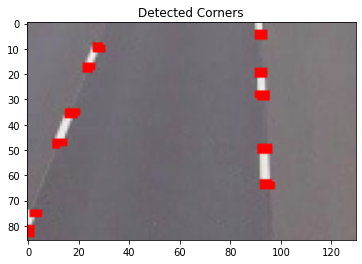

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

# Read in the image
image = cv2.imread('line.png')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

###YOUR CODE STARTS HERE

## STEP 1:  Convert to grayscale 
gray = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)
## STEP 2: Detect corners 
corners = cv2.cornerHarris(gray,2,3,0.04)

## STEP 3: Dilate corner image to enhance corner points
corners = cv2.dilate(corners,None)

## STEP 4:set threshold value as 0.1 * (maximum value of dilated corner image obtained from STEP3)
threshold = 0.1*corners.max()

## STEP 5: Count numer of detected corner points and draw them on the image
print(f'The number of corners are: {np.sum(corners>threshold)}')
print()
image_copy[corners>threshold]=[255,0,0]
plt.title('Detected Corners')
plt.imshow(image_copy)
plt.show()
### YOUR CODE ENDS HERE

# Part-2

In this section, we will train a neural network to learn to identify numerals from [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Fill out the missing pieces in each of the following cells. 

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import unittest
import matplotlib.pyplot as plt
import time
plt.style.use('seaborn-white')
## Please DONOT remove these lines. 
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)

### Data Loading and Pre-processing

In [7]:
# check availability of GPU and set the device accordingly
#### YOUR CODE STARTS HERE ####
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# define a transforms for preparing the dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
      transforms.Normalize((0.5,), (0.5,))])
         # convert the image to a pytorch tensor
        # normalise the images with mean (0.1307) and std (0.3081) of the dataset
#### YOUR CODE ENDS HERE ####

In [8]:
# Load the MNIST training, test datasets using `torchvision.datasets.MNIST` using the transform defined above
#### YOUR CODE STARTS HERE ####
train_dataset = datasets.MNIST(
        train=True,
        root="./data",
        download=True,
        transform=transform
    )
test_dataset = datasets.MNIST(
        root="./data",
        train=False,
        transform=transform
    )
#### YOUR CODE ENDS HERE ####

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
# create dataloaders for training and test datasets
# use a batch size of 32 and set shuffle=True for the training set
#### YOUR CODE STARTS HERE ####
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32,
                                          shuffle=True, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32,
                                         shuffle=False, num_workers=2)
#### YOUR CODE ENDS HERE ####

### Network Definition

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #### YOUR CODE STARTS HERE ####
        # define a conv layer with output channels as 16, kernel size of 3 and stride of 1
        self.conv1 = nn.Conv2d(1,16,kernel_size=3, stride=1) # Input = 1x28x28  Output = 16x26x26
        # define a conv layer with output channels as 32, kernel size of 3 and stride of 1
        self.conv2 = nn.Conv2d(16,32,kernel_size=3, stride=1) # Input = 16x26x26 Output = 32x24x24
        # define a conv layer with output channels as 64, kernel size of 3 and stride of 1
        self.conv3 = nn.Conv2d(32,64,kernel_size=3, stride=1)  # Input = 32x24x24  Output = 64x22x22
        # define a max pooling layer with kernel size 2
        self.pool = nn.MaxPool2d(2, 2) # input 64x22x22 output 64x11x11
        # define dropout layer with a probability of 0.25
        self.d1=nn.Dropout2d(p=0.25)
        # define dropout layer with a probability of 0.5
        self.d2=nn.Dropout(p=0.5)
        # define a linear(dense) layer with 128 output features
        self.fc1 = nn.Linear(64*11*11, 128)
        # define a linear(dense) layer with output features corresponding to the number of classes in the dataset
        self.fc2=nn.Linear(128,10)
        #### YOUR CODE ENDS HERE ####

    def forward(self, x):
        # Use the layers defined above in a sequential way (folow the same as the layer definitions above) and 
        # write the forward pass, after each of conv1, conv2, conv3 and fc1 use a relu activation. 
        # use the first dropout after maxpool and the other one before you final FC layer
        #### YOUR CODE STARTS HERE ####
        out = F.relu(self.conv1(x)) 
        out=  F.relu(self.conv2(out)) 
        out=  F.relu(self.pool(self.conv3(out))) 
        out = self.d1(out)
        out = out.view(-1,64*11*11)
        out = F.relu(self.fc1(out)) 
        out = self.d2(out)
        out = self.fc2(out)
        #### YOUR CODE ENDS HERE ####
        output = F.log_softmax(out, dim=1)
        return output

### Sanity Check
Make sure all the tests below pass without any errors, before you proceed with the training part.

In [11]:
import unittest

class TestImplementations(unittest.TestCase):
    
    # Dataloading tests
    def test_dataset(self):
        self.dataset_classes = ['0 - zero',
                                '1 - one',
                                '2 - two',
                                '3 - three',
                                '4 - four',
                                '5 - five',
                                '6 - six',
                                '7 - seven',
                                '8 - eight',
                                '9 - nine']
        self.assertTrue(train_dataset.classes == self.dataset_classes)
        self.assertTrue(train_dataset.train == True)
    
    def test_dataloader(self):        
        self.assertTrue(train_dataloader.batch_size == 32)
        self.assertTrue(test_dataloader.batch_size == 32)      
         
    def test_total_parameters(self):
        model = Net().to(device)
        self.assertTrue(sum(p.numel() for p in model.parameters()) == 1015946)

suite = unittest.TestLoader().loadTestsFromModule(TestImplementations())
unittest.TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 8.208s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

### Training and Inference

In [12]:
def train(model, device, train_loader, optimizer, epoch):

    model.train()
    train_loss=0
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
    #### YOUR CODE STARTS HERE ####
        # send the image, target to the device
        data, target = data.to(device), target.to(device)
        # flush out the gradients stored in optimizer
        optimizer.zero_grad()
        # pass the image to the model and assign the output to variable named output
        output = model(data)
        # calculate the loss (use nll_loss in pytorch)
        _, pred = torch.max(output.data, 1)
        correct += pred.eq(target.view_as(pred)).sum().item()
        loss = F.nll_loss(output, target)
        train_loss+=loss.item()
        # do a backward pass
        loss.backward()
        # update the weights
        optimizer.step()
    #### YOUR CODE ENDS HERE ####
        if batch_idx % 20 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    return (train_loss/len(train_loader)),100. * correct / len(train_loader.dataset)

In [13]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
          ### YOUR CODE STARTS HERE ####
            # send the image, target to the device
            data,target=data.to(device), target.to(device)
            # pass the image to the model and assign the output to variable named output
            output = model(data)
            loss=F.nll_loss(output,target)
            test_loss+=loss.item() # sum up batch loss
            _, pred = torch.max(output.data, 1)
          #### YOUR CODE ENDS HERE ####
            # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss,100. * correct / len(test_loader.dataset)

In [14]:
def plotter(train_loss,test_loss,train_acc,test_acc,epochs=25):
    fig, ax = plt.subplots(1, 2,figsize=(15,6))
    epochs = np.arange(epochs)
    ax[0].set_title('Training Curve')
    ax[0].plot(epochs,train_loss,'-r',label='train'), ax[0].plot(epochs,test_loss,'-b',label='test')
    ax[0].legend()
    ax[0].set_xticks(range(0,26,5))
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('Loss')
    ax[1].set_title('Accuracy Curve')
    ax[1].plot(epochs,train_acc,'-g',label='train'),ax[1].plot(epochs,test_acc,'-c',label='test')
    ax[1].legend()
    ax[1].set_xticks(range(0,26,5))
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('Accuracy')
    plt.show()

### Question 4

Use Adam as the optimiser and train the model for 25 epochs. Report the train, test loss and accuracies along with the total time taken for training. (Use plots if required)

- Time taken :  453 secs  

- Test Loss : 0.0029 

- Test Accuracy : 97%

Device:  Tesla K80
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.306760
Train Epoch: 0 [640/60000 (1%)]	Loss: 1.614090
Train Epoch: 0 [1280/60000 (2%)]	Loss: 0.822187
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.349464
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.321091
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.563327
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.465800
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.746920
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.469934
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.280167
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.654074
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.329633
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.351133
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.277445
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.088710
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.831242
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.410105
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.382308
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.463817
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.728850
Train Epoc

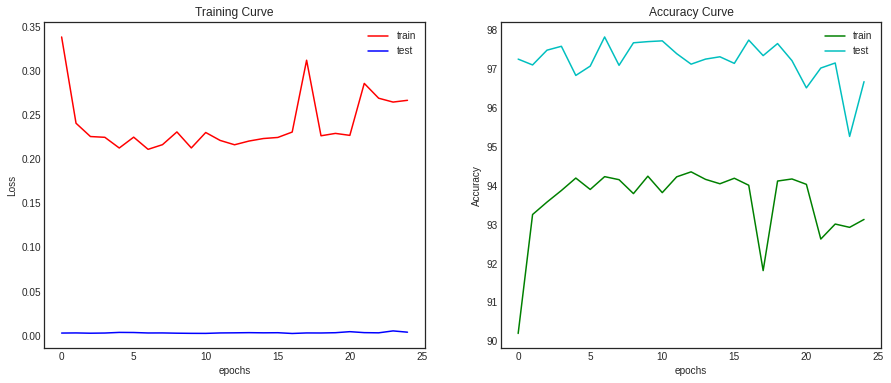

In [15]:
net = Net().to(device)
adam=optim.Adam(net.parameters(), lr=0.01)
epochs = 25
train_loss=[]
test_loss=[]
train_accuracy=[]
test_accuracy=[]

print("Device: ",end=' ')
print( torch.cuda.get_device_name()) if torch.cuda.is_available() else print("CPU")

start = time.time()
for epoch in range(epochs):
    tr_loss,train_acc = train(net,device,train_dataloader,adam,epoch)
    train_loss.append(tr_loss),train_accuracy.append(train_acc)
    te_loss,test_acc=test(net,device,test_dataloader)
    test_loss.append(te_loss),test_accuracy.append(test_acc)

time_elapsed = time.time() - start
print(f"Time taken to train the model: {time_elapsed} seconds")

plotter(train_loss,test_loss,train_accuracy,test_accuracy,epochs)

### Question 5

Modify the network defined in the previous step to replace ReLU activations with Sigmoid and report the final test accuracy. Is there a drop in accuracy, what do you think is the reason? 

## Answer :  
- Time taken : 457 secs
- Test loss : 0.0751
- Test accuracy : 9%  

Yes there is a drop in Accuracy due to Sigmoid activation function. Due to the **__Vanishing gradient__** problem. Vanishing gradients lead to very small changes in the weights proportional to the partial derivative of the error function. The gradient is multiplied ```n``` times in back propagation to get the gradients of lower layers. The effect of multiplying the gradient n times makes the gradient to be even smaller for lower layers, leading to a very small change or even no change in the weights of lower layers. Therefore, the deeper the network, the more the effect of vanishing gradients. This makes learning per iteration slower when activation functions that suffer from vanishing gradients is used e.g Sigmoid and tanh functions.

In [16]:
class Sigmoid(nn.Module):
    def __init__(self):
        super(Sigmoid, self).__init__()
        #### YOUR CODE STARTS HERE ####
        # define a conv layer with output channels as 16, kernel size of 3 and stride of 1
        self.conv1 = nn.Conv2d(1,16,kernel_size=3, stride=1) # Input = 1x28x28  Output = 16x26x26
        # define a conv layer with output channels as 32, kernel size of 3 and stride of 1
        self.conv2 = nn.Conv2d(16,32,kernel_size=3, stride=1) # Input = 16x26x26 Output = 32x24x24
        # define a conv layer with output channels as 64, kernel size of 3 and stride of 1
        self.conv3 = nn.Conv2d(32,64,kernel_size=3, stride=1)  # Input = 32x24x24  Output = 64x22x22
        # define a max pooling layer with kernel size 2
        self.pool = nn.MaxPool2d(2, 2) # input 64x22x22 output 64x11x11
        # define dropout layer with a probability of 0.25
        self.d1=nn.Dropout2d(p=0.25)
        # define dropout layer with a probability of 0.5
        self.d2=nn.Dropout(p=0.5)
        # define a linear(dense) layer with 128 output features
        self.fc1 = nn.Linear(64*11*11, 128)
        # define a linear(dense) layer with output features corresponding to the number of classes in the dataset
        self.fc2=nn.Linear(128,10)
        #### YOUR CODE ENDS HERE ####

    def forward(self, x):
        # Use the layers defined above in a sequential way (folow the same as the layer definitions above) and 
        # write the forward pass, after each of conv1, conv2, conv3 and fc1 use a relu activation. 
        # use the first dropout after maxpool and the other one before you final FC layer
        #### YOUR CODE STARTS HERE ####
        out = torch.sigmoid(self.conv1(x)) 
        out=  torch.sigmoid(self.conv2(out)) 
        out=  torch.sigmoid(self.pool(self.conv3(out))) 
        out = self.d1(out)
        out = out.view(-1,64*11*11)
        out = torch.sigmoid(self.fc1(out)) 
        out = self.d2(out)
        out = self.fc2(out)
        #### YOUR CODE ENDS HERE ####
        output = F.log_softmax(out, dim=1)
        return output

Device:  Tesla K80
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.364046
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.414514
Train Epoch: 0 [1280/60000 (2%)]	Loss: 2.357060
Train Epoch: 0 [1920/60000 (3%)]	Loss: 2.574201
Train Epoch: 0 [2560/60000 (4%)]	Loss: 2.423447
Train Epoch: 0 [3200/60000 (5%)]	Loss: 2.405205
Train Epoch: 0 [3840/60000 (6%)]	Loss: 2.302726
Train Epoch: 0 [4480/60000 (7%)]	Loss: 2.454386
Train Epoch: 0 [5120/60000 (9%)]	Loss: 2.477738
Train Epoch: 0 [5760/60000 (10%)]	Loss: 2.346027
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.306660
Train Epoch: 0 [7040/60000 (12%)]	Loss: 2.335553
Train Epoch: 0 [7680/60000 (13%)]	Loss: 2.507670
Train Epoch: 0 [8320/60000 (14%)]	Loss: 2.319513
Train Epoch: 0 [8960/60000 (15%)]	Loss: 2.507366
Train Epoch: 0 [9600/60000 (16%)]	Loss: 2.598338
Train Epoch: 0 [10240/60000 (17%)]	Loss: 2.491620
Train Epoch: 0 [10880/60000 (18%)]	Loss: 2.487937
Train Epoch: 0 [11520/60000 (19%)]	Loss: 2.340158
Train Epoch: 0 [12160/60000 (20%)]	Loss: 2.414003
Train Epoc

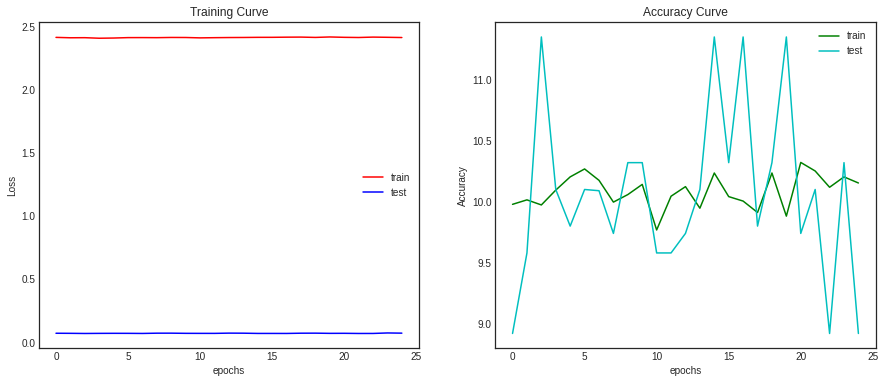

In [17]:
sigmoid_net = Sigmoid().to(device)
adam=optim.Adam(sigmoid_net.parameters(),lr=0.01)
epochs = 25
train_loss=[]
test_loss=[]
train_accuracy=[]
test_accuracy=[]

print("Device: ",end=' ')
print( torch.cuda.get_device_name()) if torch.cuda.is_available() else print("CPU")

start = time.time()
for epoch in range(epochs):
    tr_loss,train_acc = train(sigmoid_net,device,train_dataloader,adam,epoch)
    train_loss.append(tr_loss),train_accuracy.append(train_acc)
    te_loss,test_acc=test(sigmoid_net,device,test_dataloader)
    test_loss.append(te_loss),test_accuracy.append(test_acc)

time_elapsed = time.time() - start
print(f"Time taken to train the model: {time_elapsed} seconds")

plotter(train_loss,test_loss,train_accuracy,test_accuracy,epochs)

### Question 6

Train the network defined in Question-1 with a different optimiser other than Adam, do you see any difference in performance? Substantiate your observations with relevant explanations.

### Answer
 I tried with **SGD**. As we have trained for 25 epochs, 0.001 lr there was no much differencein accuracy. But, SGD usually achieves to find a minimum, but it might take significantly longer than with some of the optimizers, is much more reliant on a robust initialization and annealing schedule, and may get **stuck in saddle points** rather than local minima. Below is the animation for different optimizers and their behaviour at saddle point.  

<center>
<img src="https://ruder.io/content/images/2016/09/saddle_point_evaluation_optimizers.gif" width=200 height=200 />
</center>    

Credits: [ruder.io](https://ruder.io/optimizing-gradient-descent/index.html#gradientdescentoptimizationalgorithms)

Device:  Tesla K80
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.292164
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.300864
Train Epoch: 0 [1280/60000 (2%)]	Loss: 2.295813
Train Epoch: 0 [1920/60000 (3%)]	Loss: 2.299231
Train Epoch: 0 [2560/60000 (4%)]	Loss: 2.284776
Train Epoch: 0 [3200/60000 (5%)]	Loss: 2.283902
Train Epoch: 0 [3840/60000 (6%)]	Loss: 2.258342
Train Epoch: 0 [4480/60000 (7%)]	Loss: 2.261251
Train Epoch: 0 [5120/60000 (9%)]	Loss: 2.238374
Train Epoch: 0 [5760/60000 (10%)]	Loss: 2.264537
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.207900
Train Epoch: 0 [7040/60000 (12%)]	Loss: 2.150347
Train Epoch: 0 [7680/60000 (13%)]	Loss: 2.120820
Train Epoch: 0 [8320/60000 (14%)]	Loss: 2.111126
Train Epoch: 0 [8960/60000 (15%)]	Loss: 1.770749
Train Epoch: 0 [9600/60000 (16%)]	Loss: 1.507724
Train Epoch: 0 [10240/60000 (17%)]	Loss: 1.179966
Train Epoch: 0 [10880/60000 (18%)]	Loss: 1.217905
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.929158
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.698762
Train Epoc

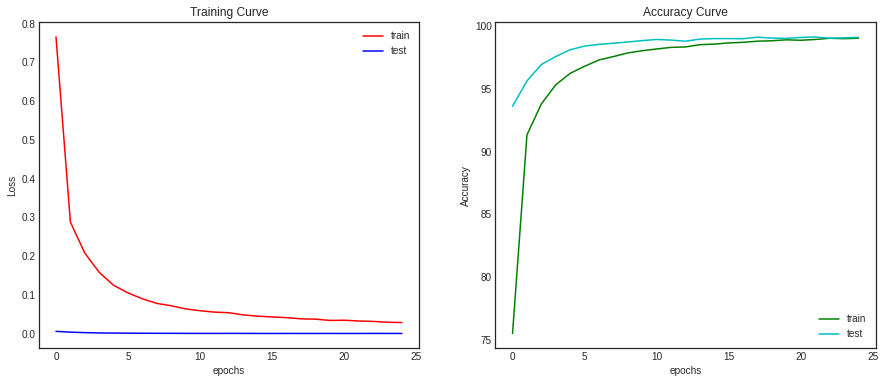

In [18]:
net = Net().to(device)
SGD=optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
epochs = 25
train_loss=[]
test_loss=[]
train_accuracy=[]
test_accuracy=[]

print("Device: ",end=' ')
print( torch.cuda.get_device_name()) if torch.cuda.is_available() else print("CPU")

start = time.time()
for epoch in range(epochs):
    tr_loss,train_acc = train(net,device,train_dataloader,SGD,epoch)
    train_loss.append(tr_loss),train_accuracy.append(train_acc)
    te_loss,test_acc=test(net,device,test_dataloader)
    test_loss.append(te_loss),test_accuracy.append(test_acc)

time_elapsed = time.time() - start
print(f"Time taken to train the model: {time_elapsed} seconds")

plotter(train_loss,test_loss,train_accuracy,test_accuracy,epochs)

### Question 7

Initialize the `Conv2d` layers in the network defined in Question-1 `(Net)` with all ones (both weights and bias). Train the network with Adam optimizer and report the final test accuracy. Is there any difference in the performance? If yes, what do you think is the reason? 

## Answer  
- Test Acc : 10%  

Yes there is a decrease in performance. This is due to Constant initialisation of weights, both hidden units will have identical influence on the cost, which will lead to identical gradients. Thus, all the neurons will evolve symmetrically throughout training, effectively preventing different neurons from learning different things.

Device:  Tesla K80
Train Epoch: 0 [0/60000 (0%)]	Loss: 42970.730469
Train Epoch: 0 [640/60000 (1%)]	Loss: 5305.617188
Train Epoch: 0 [1280/60000 (2%)]	Loss: 689.319336
Train Epoch: 0 [1920/60000 (3%)]	Loss: 2.307162
Train Epoch: 0 [2560/60000 (4%)]	Loss: 2.313349
Train Epoch: 0 [3200/60000 (5%)]	Loss: 2.283861
Train Epoch: 0 [3840/60000 (6%)]	Loss: 2.319299
Train Epoch: 0 [4480/60000 (7%)]	Loss: 2.305858
Train Epoch: 0 [5120/60000 (9%)]	Loss: 2.317093
Train Epoch: 0 [5760/60000 (10%)]	Loss: 2.290810
Train Epoch: 0 [6400/60000 (11%)]	Loss: 2.292106
Train Epoch: 0 [7040/60000 (12%)]	Loss: 2.303837
Train Epoch: 0 [7680/60000 (13%)]	Loss: 2.305759
Train Epoch: 0 [8320/60000 (14%)]	Loss: 2.293089
Train Epoch: 0 [8960/60000 (15%)]	Loss: 2.287087
Train Epoch: 0 [9600/60000 (16%)]	Loss: 2.268939
Train Epoch: 0 [10240/60000 (17%)]	Loss: 2.272361
Train Epoch: 0 [10880/60000 (18%)]	Loss: 2.301496
Train Epoch: 0 [11520/60000 (19%)]	Loss: 2.272113
Train Epoch: 0 [12160/60000 (20%)]	Loss: 2.288300
T

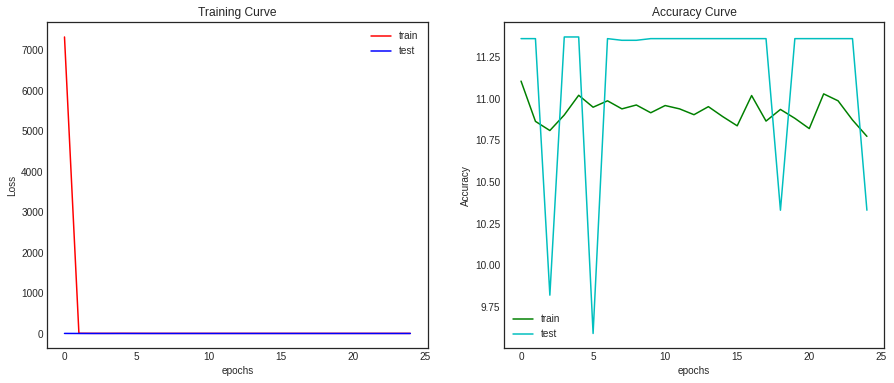

In [19]:
def init_weights(m):
    if type(m) == nn.Conv2d:
        torch.nn.init.constant_(m.weight,1)
        m.bias.data.fill_(1)
        
net = Net().to(device)
net.apply(init_weights)
adam=optim.Adam(net.parameters(),lr=0.01)
epochs = 25
train_loss=[]
test_loss=[]
train_accuracy=[]
test_accuracy=[]

print("Device: ",end=' ')
print( torch.cuda.get_device_name()) if torch.cuda.is_available() else print("CPU")

start = time.time()
for epoch in range(epochs):
    tr_loss,train_acc = train(net,device,train_dataloader,adam,epoch)
    train_loss.append(tr_loss),train_accuracy.append(train_acc)
    te_loss,test_acc=test(net,device,test_dataloader)
    test_loss.append(te_loss),test_accuracy.append(test_acc)

time_elapsed = time.time() - start
print(f"Time taken to train the model: {time_elapsed} seconds")

plotter(train_loss,test_loss,train_accuracy,test_accuracy,epochs)


### Question 8

Initialize the network defined in Question-1 `(Net)` with Xavier's initialization ([torch.nn.init.xavier_normal](https://pytorch.org/docs/stable/nn.init.html))(for bias use zero). Train the network with Adam optimizer and report the final test accuracy.

### Answer:  
- Time taken to train : 688 secs
- Test acc : 97%  
- Test Loss : 0.0028

Device:  Tesla K80
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.259732
Train Epoch: 0 [640/60000 (1%)]	Loss: 1.510492
Train Epoch: 0 [1280/60000 (2%)]	Loss: 1.762675
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.463319
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.691934
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.531996
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.358400
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.265123
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.621428
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.244089
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.352408
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.170256
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.901732
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.162587
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.455548
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.200291
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.360841
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.251115
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.232057
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.203034
Train Epoc

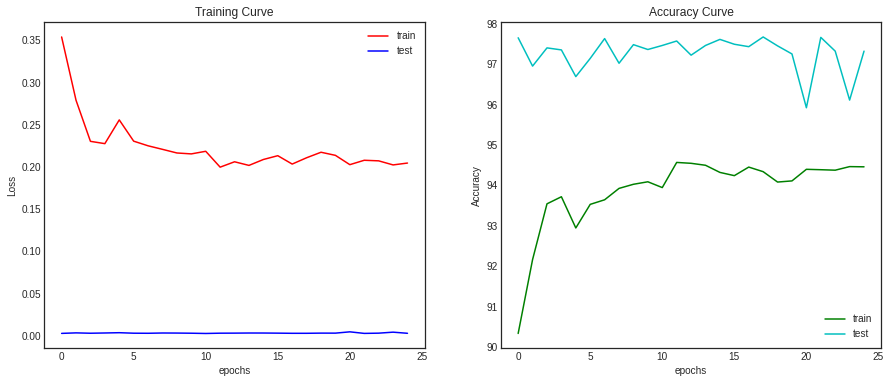

In [20]:
def weights_init(m):
    if isinstance(m,(nn.Conv2d,nn.Linear)):
        torch.nn.init.xavier_normal_(m.weight)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)
net = Net().to(device)
net.apply(weights_init)
adam=optim.Adam(net.parameters() ,lr=0.01)
epochs = 25
train_loss=[]
test_loss=[]
train_accuracy=[]
test_accuracy=[]

print("Device: ",end=' ')
print( torch.cuda.get_device_name()) if torch.cuda.is_available() else print("CPU")

start = time.time()
for epoch in range(epochs):
    tr_loss,train_acc = train(net,device,train_dataloader,adam,epoch)
    train_loss.append(tr_loss),train_accuracy.append(train_acc)
    te_loss,test_acc=test(net,device,test_dataloader)
    test_loss.append(te_loss),test_accuracy.append(test_acc)

time_elapsed = time.time() - start
print(f"Time taken to train the model: {time_elapsed} seconds")

plotter(train_loss,test_loss,train_accuracy,test_accuracy,epochs)

### Question 9

Add three batch-norm layers to the network defined in `Question-1` and report the final test accuracy. How does batch-norm help? 

## Answer  
- Test Acc : 99%
- Test Loss : 0.0016  

The following are the Advantages of Batchnorm:

- Improves gradient flow through very deep networks
- Reduces dependency on careful initialization
- Allows higher learning rates
- Provides regularization and reduces dependency on dropout


In [21]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        #### YOUR CODE STARTS HERE ####
        # define a conv layer with output channels as 16, kernel size of 3 and stride of 1
        self.conv1 = nn.Conv2d(1,16,kernel_size=3, stride=1) # Input = 1x28x28  Output = 16x26x26
        self.conv1bn = nn.BatchNorm2d(16)
        # define a conv layer with output channels as 32, kernel size of 3 and stride of 1
        self.conv2 = nn.Conv2d(16,32,kernel_size=3, stride=1) # Input = 16x26x26 Output = 32x24x24
        self.conv2bn = nn.BatchNorm2d(32)
        # define a conv layer with output channels as 64, kernel size of 3 and stride of 1
        self.conv3 = nn.Conv2d(32,64,kernel_size=3, stride=1)  # Input = 32x24x24  Output = 64x22x22
        self.conv3bn = nn.BatchNorm2d(64)
        # define a max pooling layer with kernel size 2
        self.pool = nn.MaxPool2d(2, 2) # input 64x22x22 output 64x11x11
        # define dropout layer with a probability of 0.25
        self.d1=nn.Dropout2d(p=0.25)
        # define dropout layer with a probability of 0.5
        self.d2=nn.Dropout(p=0.5)
        # define a linear(dense) layer with 128 output features
        self.fc1 = nn.Linear(64*11*11, 128)
        # define a linear(dense) layer with output features corresponding to the number of classes in the dataset
        self.fc2=nn.Linear(128,10)
        #### YOUR CODE ENDS HERE ####

    def forward(self, x):
        # Use the layers defined above in a sequential way (folow the same as the layer definitions above) and 
        # write the forward pass, after each of conv1, conv2, conv3 and fc1 use a relu activation. 
        # use the first dropout after maxpool and the other one before you final FC layer
        #### YOUR CODE STARTS HERE ####
        out = F.relu(self.conv1bn(self.conv1(x)))
        out = F.relu(self.conv2bn(self.conv2(out)))
        out = F.relu(self.pool(self.conv3bn(self.conv3(out))))
        out = self.d1(out)
        out = out.view(-1,64*11*11)
        out = F.relu(self.fc1(out))
        out = self.d2(out)
        out = self.fc2(out)
        #### YOUR CODE ENDS HERE ####
        output = F.log_softmax(out, dim=1)
        return output

Device:  Tesla K80
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.387965
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.105677
Train Epoch: 0 [1280/60000 (2%)]	Loss: 1.734358
Train Epoch: 0 [1920/60000 (3%)]	Loss: 1.733263
Train Epoch: 0 [2560/60000 (4%)]	Loss: 1.756239
Train Epoch: 0 [3200/60000 (5%)]	Loss: 1.573763
Train Epoch: 0 [3840/60000 (6%)]	Loss: 1.983135
Train Epoch: 0 [4480/60000 (7%)]	Loss: 1.409976
Train Epoch: 0 [5120/60000 (9%)]	Loss: 1.281111
Train Epoch: 0 [5760/60000 (10%)]	Loss: 1.215732
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.284953
Train Epoch: 0 [7040/60000 (12%)]	Loss: 1.261218
Train Epoch: 0 [7680/60000 (13%)]	Loss: 1.370250
Train Epoch: 0 [8320/60000 (14%)]	Loss: 1.357106
Train Epoch: 0 [8960/60000 (15%)]	Loss: 1.356930
Train Epoch: 0 [9600/60000 (16%)]	Loss: 1.392924
Train Epoch: 0 [10240/60000 (17%)]	Loss: 1.209190
Train Epoch: 0 [10880/60000 (18%)]	Loss: 1.113690
Train Epoch: 0 [11520/60000 (19%)]	Loss: 1.231960
Train Epoch: 0 [12160/60000 (20%)]	Loss: 1.349052
Train Epoc

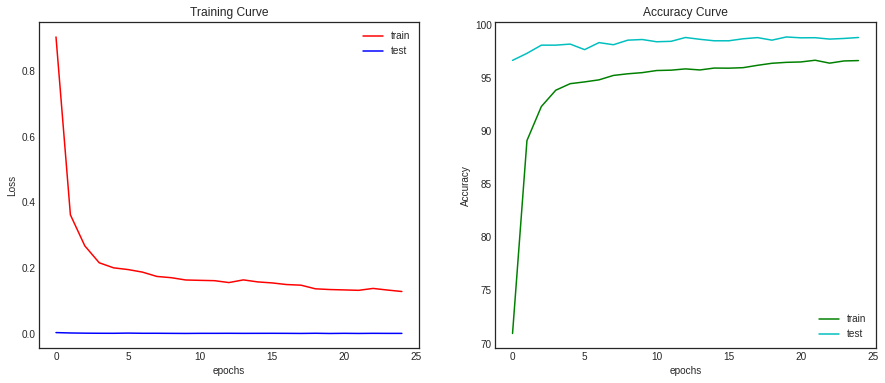

In [22]:
net = Net2().to(device)
adam=optim.Adam(net.parameters(),lr=0.01)
epochs = 25
train_loss=[]
test_loss=[]
train_accuracy=[]
test_accuracy=[]

print("Device: ",end=' ')
print( torch.cuda.get_device_name()) if torch.cuda.is_available() else print("CPU")

start = time.time()
for epoch in range(epochs):
    tr_loss,train_acc = train(net,device,train_dataloader,adam,epoch)
    train_loss.append(tr_loss),train_accuracy.append(train_acc)
    te_loss,test_acc=test(net,device,test_dataloader)
    test_loss.append(te_loss),test_accuracy.append(test_acc)

time_elapsed = time.time() - start
print(f"Time taken to train the model: {time_elapsed} seconds")

plotter(train_loss,test_loss,train_accuracy,test_accuracy,epochs)

# Part-3 (Optional)

This section is un-graded and purely for practice. 

Main focus of this part is to help you flex the deep learning muscles built in the above part. You should build a network on the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This dataset is similar to MNIST but unlike MNIST, the images are colored and more complex. 

As of writing this, the state-of-the-art(SoTA) performance on this dataset is 98.98%. You can try to start with the simple network we defined above for the MNSIT dataset(with some modification for dealing with different sized colored images unlike MNIST). But to achive the SoTA performance you need to do a lot of hackery. These are list of few things, we would encourage you to try: 

- Use data augmentation wisely. Read and understand how to perform the augmentations listed below. 
    * RandomFlips, Color Jittering
    * Cutout, Cutmix
    * Mixup
    * Auto-augment

- Try to increase the image size using standard image interpolation techniques. Try using tricks like Progressive resizing of images and see if it helps. 

- After certain number of layers, adding more layer might not be of much help, run experiments on SVHN and see if you observe this. 

- To understand the difficulties in training deeper networks read this paper: [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)

- To improve the performance on SVHN, try using architectures like [ResNet](https://arxiv.org/abs/1512.03385), [DesnseNet](https://arxiv.org/abs/1608.06993) or [EfficientNet](https://arxiv.org/abs/1905.11946). Most of these architectures are available by default in PyTorch.
